In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

df_weather = pd.read_csv("../data/citylearn_challenge_2022_phase_1/weather.csv")

In [6]:
df_weather.head()

,Outdoor Drybulb Temperature [C],Relative Humidity [%],Diffuse Solar Radiation [W/m2],Direct Solar Radiation [W/m2],6h Prediction Outdoor Drybulb Temperature [C],12h Prediction Outdoor Drybulb Temperature [C],24h Prediction Outdoor Drybulb Temperature [C],6h Prediction Relative Humidity [%],12h Prediction Relative Humidity [%],24h Prediction Relative Humidity [%],6h Prediction Diffuse Solar Radiation [W/m2],12h Prediction Diffuse Solar Radiation [W/m2],24h Prediction Diffuse Solar Radiation [W/m2],6h Prediction Direct Solar Radiation [W/m2],12h Prediction Direct Solar Radiation [W/m2],24h Prediction Direct Solar Radiation [W/m2]
0,20.0,84.0,0.0,0.0,18.3,22.8,20.0,81.0,68.0,81.0,25.0,964.0,0.0,100.0,815.0,0.0
1,20.1,79.0,0.0,0.0,19.4,22.8,19.4,79.0,71.0,87.0,201.0,966.0,0.0,444.0,747.0,0.0
2,19.7,78.0,0.0,0.0,21.1,22.2,19.4,73.0,73.0,87.0,420.0,683.0,0.0,592.0,291.0,0.0
3,19.3,78.0,0.0,0.0,22.2,22.8,19.4,71.0,71.0,90.0,554.0,522.0,0.0,491.0,153.0,0.0
4,18.9,78.0,0.0,0.0,21.7,22.2,18.9,73.0,71.0,90.0,778.0,444.0,0.0,734.0,174.0,0.0


In [7]:
df_weather.describe()

,Outdoor Drybulb Temperature [C],Relative Humidity [%],Diffuse Solar Radiation [W/m2],Direct Solar Radiation [W/m2],6h Prediction Outdoor Drybulb Temperature [C],12h Prediction Outdoor Drybulb Temperature [C],24h Prediction Outdoor Drybulb Temperature [C],6h Prediction Relative Humidity [%],12h Prediction Relative Humidity [%],24h Prediction Relative Humidity [%],6h Prediction Diffuse Solar Radiation [W/m2],12h Prediction Diffuse Solar Radiation [W/m2],24h Prediction Diffuse Solar Radiation [W/m2],6h Prediction Direct Solar Radiation [W/m2],12h Prediction Direct Solar Radiation [W/m2],24h Prediction Direct Solar Radiation [W/m2]
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,16.837454,73.004224,208.282192,201.231507,16.837454,16.837454,16.837454,73.004224,73.004224,73.004224,208.282192,208.282192,208.282192,201.231507,201.231507,201.231507
std,3.564816,16.480251,292.799407,296.193301,3.564816,3.564816,3.564816,16.480251,16.480251,16.480251,292.799407,292.799407,292.799407,296.193301,296.193301,296.193301
min,5.600000,10.000000,0.000000,0.000000,5.600000,5.600000,5.600000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.400000,65.000000,0.000000,0.000000,14.400000,14.400000,14.400000,65.000000,65.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.200000,76.000000,10.000000,0.000000,17.200000,17.200000,17.200000,76.000000,76.000000,76.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000
75%,19.400000,84.000000,382.000000,424.000000,19.400000,19.400000,19.400000,84.000000,84.000000,84.000000,382.000000,382.000000,382.000000,424.000000,424.000000,424.000000
max,32.200000,100.000000,1017.000000,953.000000,32.200000,32.200000,32.200000,100.000000,100.000000,100.000000,1017.000000,1017.000000,1017.000000,953.000000,953.000000,953.000000


<AxesSubplot:>

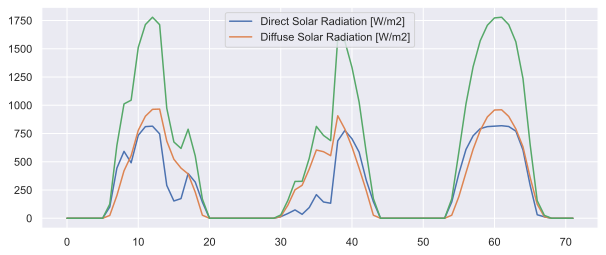

In [8]:
solar_features = ["Direct Solar Radiation [W/m2]", "Diffuse Solar Radiation [W/m2]"]

df_weather[solar_features][:72].plot(
    kind="line", subplots=False, layout=(1, 2), sharex=False, figsize=(10, 4)
)

df_weather["Global Solar Radiation [W/m2]"] = df_weather[solar_features[0]] + df_weather[solar_features[1]]

df_weather["Global Solar Radiation [W/m2]"][:72].plot(
    kind="line", subplots=False, layout=(1, 2), sharex=False, figsize=(10, 4)
)

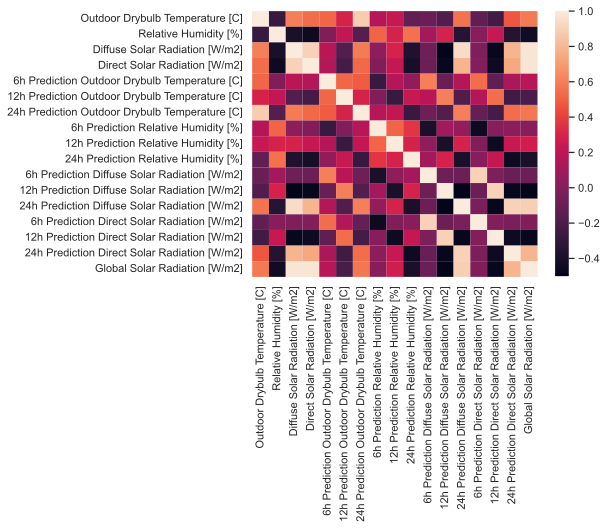

In [9]:
corr_matrix = df_weather.corr()
sns.heatmap(corr_matrix);

In [10]:
df_weather["6h Global Solar Radiation [W/m2]"] = df_weather["6h Prediction Diffuse Solar Radiation [W/m2]"] + df_weather["6h Prediction Direct Solar Radiation [W/m2]"]
df_weather["12h Global Solar Radiation [W/m2]"] = df_weather["12h Prediction Diffuse Solar Radiation [W/m2]"] + df_weather["12h Prediction Direct Solar Radiation [W/m2]"]
df_weather["24h Global Solar Radiation [W/m2]"] = df_weather["24h Prediction Diffuse Solar Radiation [W/m2]"] + df_weather["24h Prediction Direct Solar Radiation [W/m2]"]

<AxesSubplot:>

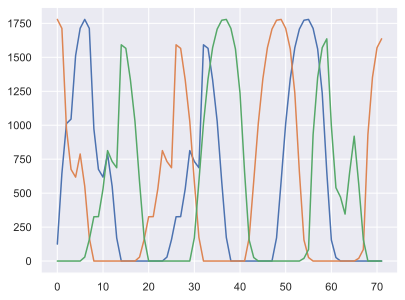

In [11]:
df_weather["6h Global Solar Radiation [W/m2]"][:72].plot.line()
df_weather["12h Global Solar Radiation [W/m2]"][:72].plot.line()
df_weather["24h Global Solar Radiation [W/m2]"][:72].plot.line()


In [12]:
df_pricing = pd.read_csv("../data/citylearn_challenge_2022_phase_1/pricing.csv")

price_features = ["Electricity Pricing [$]"]

In [13]:
df_carbon = pd.read_csv("../data/citylearn_challenge_2022_phase_1/carbon_intensity.csv")


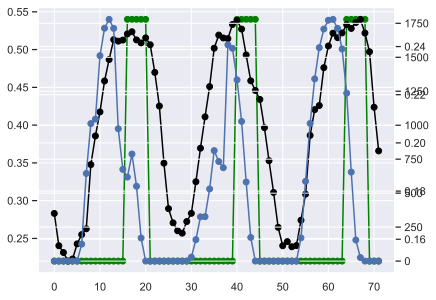

In [14]:
# (df_pricing[price_features] + df_carbon)[:72].plot.line()
# df_carbon[:72].plot.line()

fig,ax=plt.subplots()
ax.plot(df_pricing[price_features][:72], marker="o", color="green")
ax2 = ax.twinx()
ax2.plot(df_carbon[:72], marker="o", color="black")
ax3 = ax.twinx()
ax3.plot(df_weather["Global Solar Radiation [W/m2]"][:72], marker="o")

# ax.plot(df_weather["Global Solar Radiation [W/m2]"][:72], marker="o")
plt.show()

In [15]:
df_carbon.describe()

,kg_CO2/kWh
count,8760.000000
mean,0.156531
std,0.035370
min,0.070383
25%,0.131080
50%,0.154263
75%,0.178429
max,0.281796


In [16]:
df_pricing.describe()

,Electricity Pricing [$],6h Prediction Electricity Pricing [$],12h Prediction Electricity Pricing [$],24h Prediction Electricity Pricing [$]
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,0.273131,0.273131,0.273131,0.273131
std,0.117803,0.117803,0.117803,0.117803
min,0.210000,0.210000,0.210000,0.210000
25%,0.210000,0.210000,0.210000,0.210000
50%,0.210000,0.210000,0.210000,0.210000
75%,0.220000,0.220000,0.220000,0.220000
max,0.540000,0.540000,0.540000,0.540000


In [35]:
df_weather.head()

,Outdoor Drybulb Temperature [C],Relative Humidity [%],Diffuse Solar Radiation [W/m2],Direct Solar Radiation [W/m2],6h Prediction Outdoor Drybulb Temperature [C],12h Prediction Outdoor Drybulb Temperature [C],24h Prediction Outdoor Drybulb Temperature [C],6h Prediction Relative Humidity [%],12h Prediction Relative Humidity [%],24h Prediction Relative Humidity [%],6h Prediction Diffuse Solar Radiation [W/m2],12h Prediction Diffuse Solar Radiation [W/m2],24h Prediction Diffuse Solar Radiation [W/m2],6h Prediction Direct Solar Radiation [W/m2],12h Prediction Direct Solar Radiation [W/m2],24h Prediction Direct Solar Radiation [W/m2]
0,20.0,84.0,0.0,0.0,18.3,22.8,20.0,81.0,68.0,81.0,25.0,964.0,0.0,100.0,815.0,0.0
1,20.1,79.0,0.0,0.0,19.4,22.8,19.4,79.0,71.0,87.0,201.0,966.0,0.0,444.0,747.0,0.0
2,19.7,78.0,0.0,0.0,21.1,22.2,19.4,73.0,73.0,87.0,420.0,683.0,0.0,592.0,291.0,0.0
3,19.3,78.0,0.0,0.0,22.2,22.8,19.4,71.0,71.0,90.0,554.0,522.0,0.0,491.0,153.0,0.0
4,18.9,78.0,0.0,0.0,21.7,22.2,18.9,73.0,71.0,90.0,778.0,444.0,0.0,734.0,174.0,0.0


In [36]:
df_weather.describe()

,Outdoor Drybulb Temperature [C],Relative Humidity [%],Diffuse Solar Radiation [W/m2],Direct Solar Radiation [W/m2],6h Prediction Outdoor Drybulb Temperature [C],12h Prediction Outdoor Drybulb Temperature [C],24h Prediction Outdoor Drybulb Temperature [C],6h Prediction Relative Humidity [%],12h Prediction Relative Humidity [%],24h Prediction Relative Humidity [%],6h Prediction Diffuse Solar Radiation [W/m2],12h Prediction Diffuse Solar Radiation [W/m2],24h Prediction Diffuse Solar Radiation [W/m2],6h Prediction Direct Solar Radiation [W/m2],12h Prediction Direct Solar Radiation [W/m2],24h Prediction Direct Solar Radiation [W/m2]
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,16.837454,73.004224,208.282192,201.231507,16.837454,16.837454,16.837454,73.004224,73.004224,73.004224,208.282192,208.282192,208.282192,201.231507,201.231507,201.231507
std,3.564816,16.480251,292.799407,296.193301,3.564816,3.564816,3.564816,16.480251,16.480251,16.480251,292.799407,292.799407,292.799407,296.193301,296.193301,296.193301
min,5.600000,10.000000,0.000000,0.000000,5.600000,5.600000,5.600000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.400000,65.000000,0.000000,0.000000,14.400000,14.400000,14.400000,65.000000,65.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.200000,76.000000,10.000000,0.000000,17.200000,17.200000,17.200000,76.000000,76.000000,76.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000
75%,19.400000,84.000000,382.000000,424.000000,19.400000,19.400000,19.400000,84.000000,84.000000,84.000000,382.000000,382.000000,382.000000,424.000000,424.000000,424.000000
max,32.200000,100.000000,1017.000000,953.000000,32.200000,32.200000,32.200000,100.000000,100.000000,100.000000,1017.000000,1017.000000,1017.000000,953.000000,953.000000,953.000000


<AxesSubplot:>

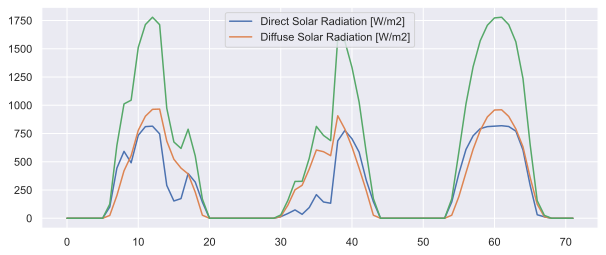

In [37]:
solar_features = ["Direct Solar Radiation [W/m2]", "Diffuse Solar Radiation [W/m2]"]

df_weather[solar_features][:72].plot(
    kind="line", subplots=False, layout=(1, 2), sharex=False, figsize=(10, 4)
)

df_weather["Global Solar Radiation [W/m2]"] = df_weather[solar_features[0]] + df_weather[solar_features[1]]

df_weather["Global Solar Radiation [W/m2]"][:72].plot(
    kind="line", subplots=False, layout=(1, 2), sharex=False, figsize=(10, 4)
)

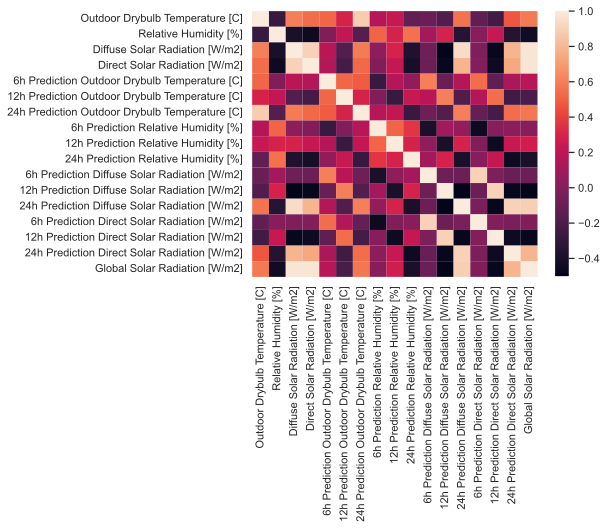

In [38]:
corr_matrix = df_weather.corr()
sns.heatmap(corr_matrix);

In [39]:
df_weather["6h Global Solar Radiation [W/m2]"] = df_weather["6h Prediction Diffuse Solar Radiation [W/m2]"] + df_weather["6h Prediction Direct Solar Radiation [W/m2]"]
df_weather["12h Global Solar Radiation [W/m2]"] = df_weather["12h Prediction Diffuse Solar Radiation [W/m2]"] + df_weather["12h Prediction Direct Solar Radiation [W/m2]"]
df_weather["24h Global Solar Radiation [W/m2]"] = df_weather["24h Prediction Diffuse Solar Radiation [W/m2]"] + df_weather["24h Prediction Direct Solar Radiation [W/m2]"]

<AxesSubplot:>

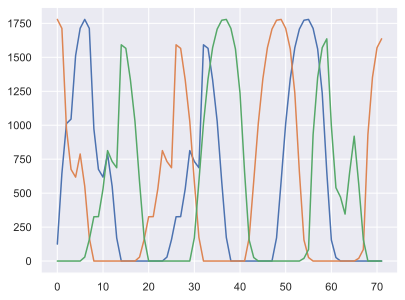

In [40]:
df_weather["6h Global Solar Radiation [W/m2]"][:72].plot.line()
df_weather["12h Global Solar Radiation [W/m2]"][:72].plot.line()
df_weather["24h Global Solar Radiation [W/m2]"][:72].plot.line()


In [41]:
df_pricing = pd.read_csv("../data/citylearn_challenge_2022_phase_1/pricing.csv")

price_features = ["Electricity Pricing [$]"]

In [42]:
df_carbon = pd.read_csv("../data/citylearn_challenge_2022_phase_1/carbon_intensity.csv")


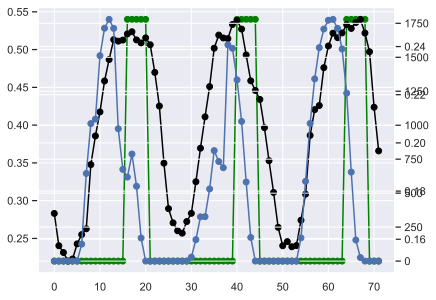

In [48]:
# (df_pricing[price_features] + df_carbon)[:72].plot.line()
# df_carbon[:72].plot.line()

fig,ax=plt.subplots()
ax.plot(df_pricing[price_features][:72], marker="o", color="green")
ax2 = ax.twinx()
ax2.plot(df_carbon[:72], marker="o", color="black")
ax3 = ax.twinx()
ax3.plot(df_weather["Global Solar Radiation [W/m2]"][:72], marker="o")

# ax.plot(df_weather["Global Solar Radiation [W/m2]"][:72], marker="o")
plt.show()